# GOY Control

## The logistic map

The 1-D logistic map update is
$$ x_{n+1} = r x_n (1 - x_n).$$

In [2]:
% pylab inline
from tqdm import tqdm

Populating the interactive namespace from numpy and matplotlib


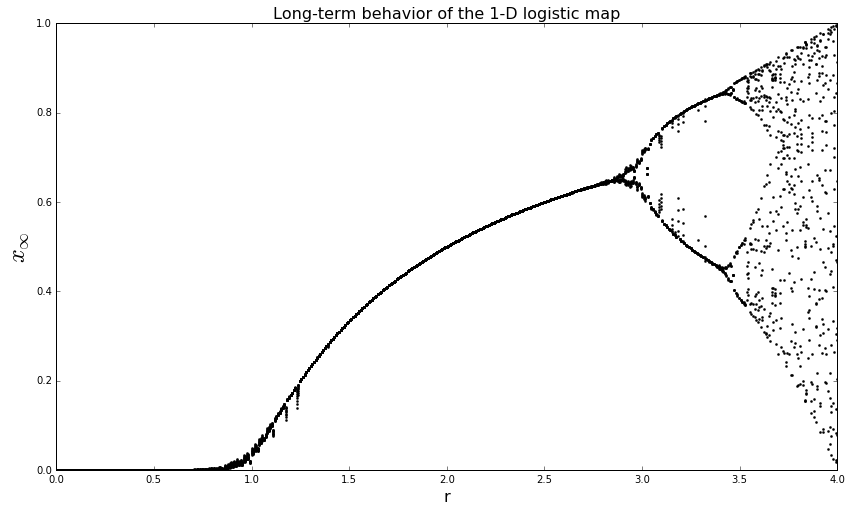

In [3]:
nr = 501
rvals = linspace(0,4,nr)
nt = 25
X = rand(nt,nr)
for t in range(1,nt):
    X[t,:] = rvals*X[t-1,:]*(1 - X[t-1,:])
figure(figsize=(14,8))
for ir in range(len(rvals)):
    plot(rvals[ir]*ones(shape=(len(range(nt-10,nt)),1)),X[range(nt-10,nt),ir],'o',markersize=2,markerfacecolor='k')
xlabel('r',fontsize=16)
ylabel('$x_\infty$',fontsize=24)
title('Long-term behavior of the 1-D logistic map',fontsize=16);

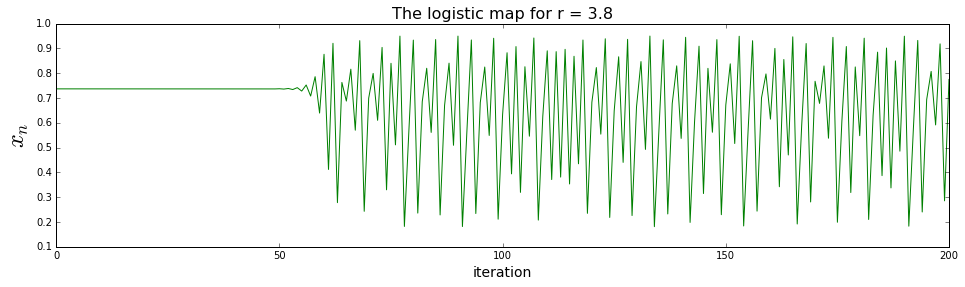

In [4]:
random.seed(0)
r = 3.8
n = 201
x = rand(n,3)
x0 = 1 - 1./r
x[0,1] = x0
x[0,2] = x0+0.0001
for t in range(1,n):
    x[t,:] = r*x[t-1,:]*(1 - x[t-1,:])
figure(figsize=(16,4))
plot(x[:,1],"g");
xlabel('iteration',fontsize=14)
ylabel('$x_n$',fontsize=24);
title('The logistic map for r = {}'.format(r),fontsize=16);

## Stabilizing the orbit

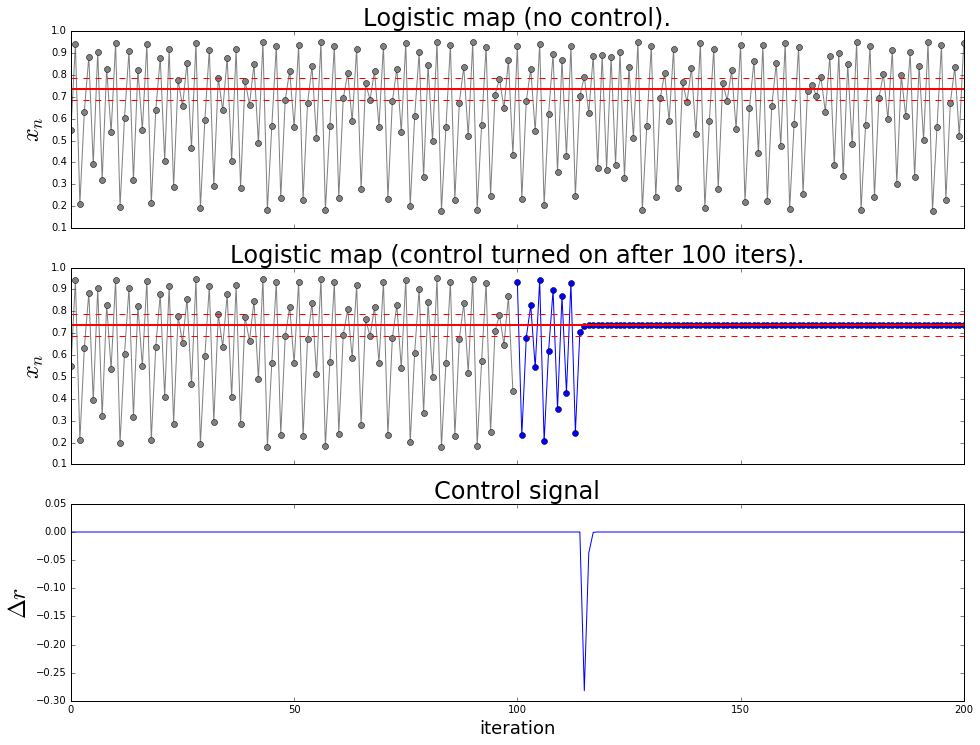

In [5]:
random.seed(0)
r0 = 3.8
n = 201
x = rand(n,2)
x[0,1] = x[0,0]
x0 = 1 - 1./r0
r  = ones(shape=(n,1))*r0
c = 0*r
dr = 0*r;
d  = 0.05
for t in range(1,n):
    x[t,0] = r0*x[t-1,0]*(1 - x[t-1,0])
    xn = x[t-1,1]
    dx = xn - x0
    c[t] = abs(dx)<d
    if t>n/2. and (abs(dx)<d):
        dr[t] = r0*dx*(2*x0 - 1)/xn/(1 - xn)
    x[t,1] = (r0+dr[t])*xn*(1-xn)
    
f, ax = subplots(3, sharex=True,figsize=(16,12))
ax[0].plot(x[:,0],'o-',color=[0.5,0.5,0.5]);
ax[0].plot([0,n-1],[x0,x0],'r',linewidth=2)
ax[0].plot([0,n-1],[x0-d,x0-d],'r--')
ax[0].plot([0,n-1],[x0+d,x0+d],'r--')
ax[0].set_title('Logistic map (no control).',fontsize=24);
ax[0].set_ylabel('$x_n$',fontsize=24);
ax[1].plot(x[range(n/2),1],'o-',color=[0.5,0.5,0.5])
ax[1].plot(range(n/2,n), x[range(n/2,n),1],'o-')
ax[1].plot([0,n-1],[x0,x0],'r',linewidth=2)
ax[1].plot([0,n-1],[x0-d,x0-d],'r--')
ax[1].plot([0,n-1],[x0+d,x0+d],'r--')
ax[1].set_title('Logistic map (control turned on after 100 iters).',fontsize=24);
ax[1].set_ylabel('$x_n$',fontsize=24);
ax[2].plot(dr)
ax[2].set_ylabel('$\Delta r$',fontsize=24)
xlabel('iteration',fontsize=18);
title('Control signal',fontsize=24);

# Pyargas Control

## The Rössler System

The Rössler system is a simplified version of the Lorenz attractor. Its equations are
$$ \dot x = -y - z, \quad \dot y = x + 0.2 y, \quad \dot{z} = 0.2 + z(x - 5.7).$$

In [6]:
from mpl_toolkits.mplot3d import Axes3D

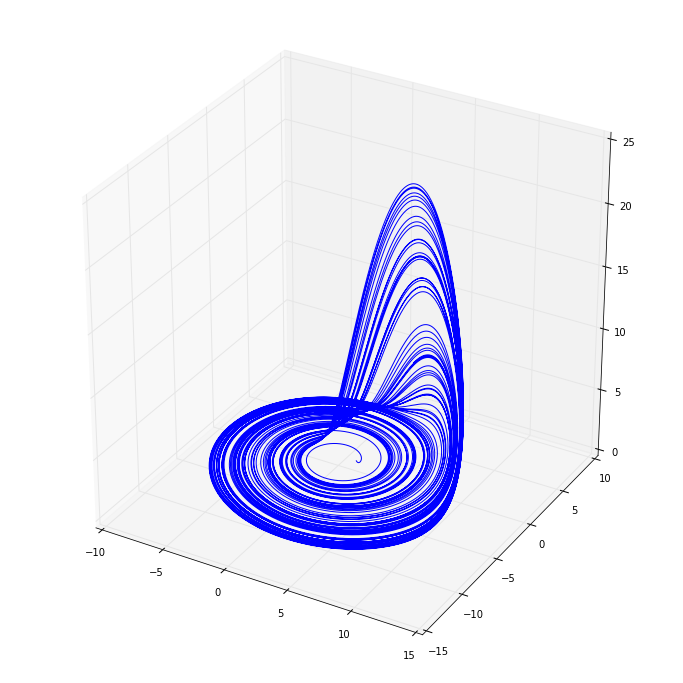

In [7]:
random.seed(0)
T  = 500001
dt = 1e-3
P  = randn(3,T)

for t in tqdm(range(1,T)):
    x = P[0,t-1]
    y = P[1,t-1]
    z = P[2,t-1]
    dPdt = array([-y - z, x + 0.2*y, 0.2 + z*(x - 5.7)])
    P[:,t] = P[:,t-1] + dPdt*dt

fig = figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')
ax.plot(P[0,:],P[1,:],P[2,:]);

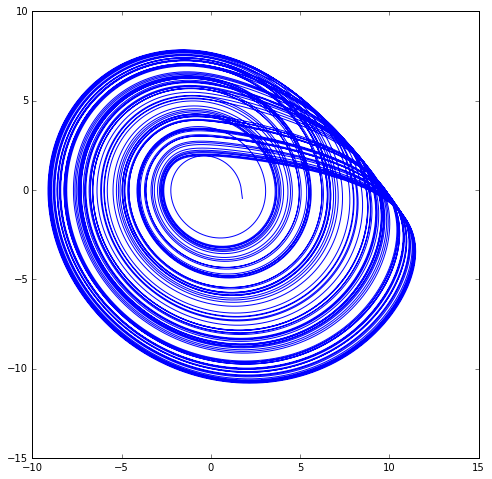

In [8]:
figure(figsize=(8,8))
plot(P[0,:],P[1,:])

## Stabilization

In [9]:
random.seed(0)
T  = 500001
dt = 1e-3
Q  = randn(3,T)
D  = zeros(shape=(T,1))
tau =int(12./dt)
K = 0.2
for t in tqdm(range(1,T)):
    x = Q[0,t-1]
    y = Q[1,t-1]
    fb = 0
    if t>tau:
        yd = Q[1,t-1-tau]
        fb = yd - y
    D[t] = fb
    z = Q[2,t-1]
    dQdt = array([-y - z, x + 0.2*y + K*fb, 0.2 + z*(x - 5.7)])
    Q[:,t] = Q[:,t-1] + dQdt*dt

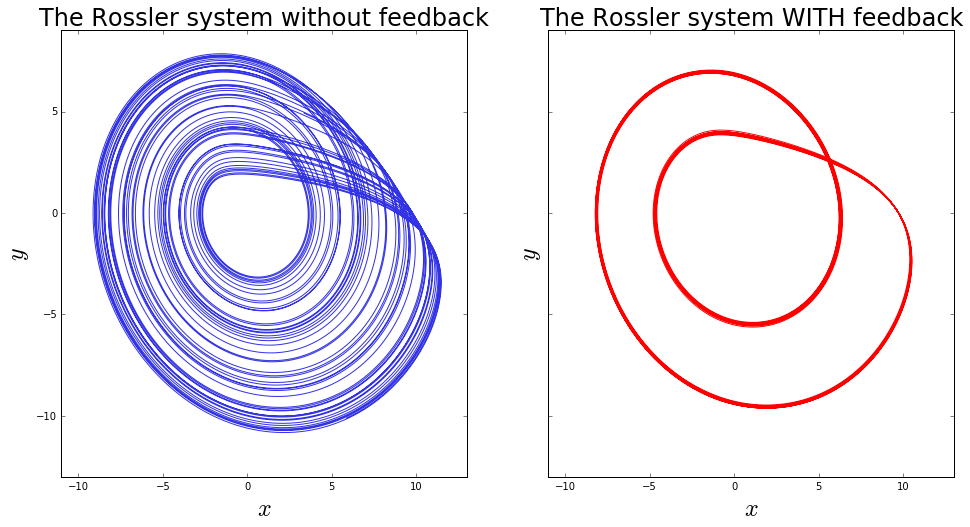

In [10]:
f, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True,figsize=(16,8))
tt = range(200000,T)
ax1.plot(P[0,tt],P[1,tt],color=[0.2,0.2,0.9])
ax1.set_xlim([-11,13])
ax1.set_ylim([-13,9])
ax1.set_xlabel('$x$',fontsize=24)
ax1.set_ylabel('$y$',fontsize=24)
ax1.set_title('The Rossler system without feedback',fontsize=24)
ax2.plot(Q[0,tt],Q[1,tt],'r');
ax2.set_xlabel('$x$',fontsize=24)
ax2.set_ylabel('$y$',fontsize=24)
ax2.set_title('The Rossler system WITH feedback',fontsize=24);

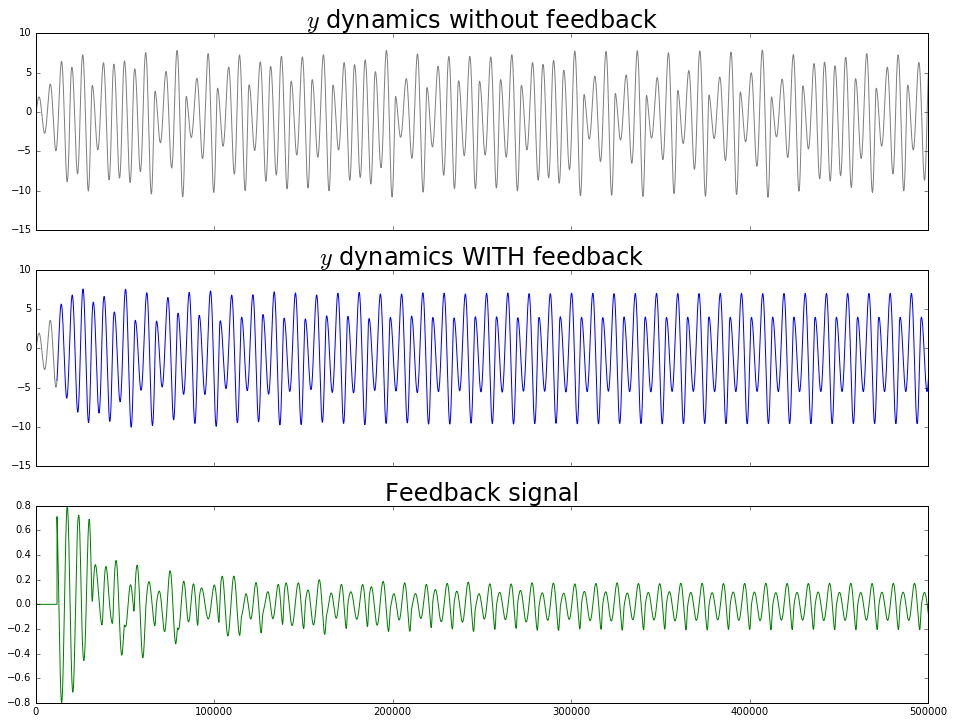

In [11]:
f, ax = subplots(3, sharex=True,figsize=(16,12))
t = array(range(T))
ax[0].plot(t,P[1,:],color=[0.5,0.5,0.5])
ax[0].set_title('$y$ dynamics without feedback',fontsize=24)
ax[1].plot(t[range(tau)],Q[1,range(tau)],color=[0.5,0.5,0.5])
ax[1].plot(t[range(tau,T)],Q[1,range(tau,T)],color=[0,0,1])
ax[1].set_title('$y$ dynamics WITH feedback',fontsize=24)
ax[2].plot(t,K*D,color='g')
ax[2].set_title('Feedback signal',fontsize=24)

# Periodic Orbits

In [12]:
drdt = lambda a,r: a*r*(1-r**2)
dthdt= lambda a,r: 1.0

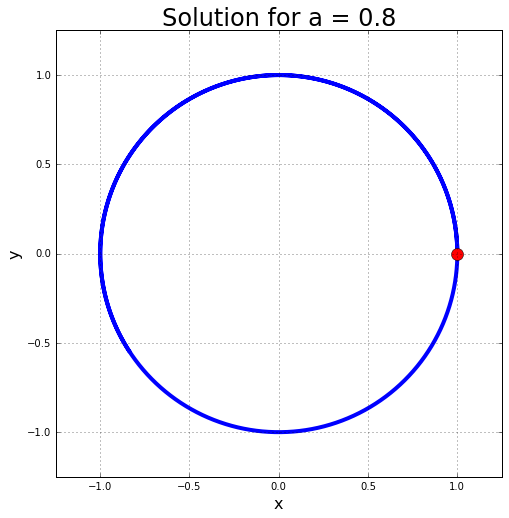

In [13]:
a = 0.8
dt = 1e-3;
T = 10000
r = ones(shape=(T,))*1
th = zeros(shape=(T,))
for t in range(1,T):
    r[t] = r[t-1] + drdt(a,r[t-1])*dt
    th[t]= th[t-1] + dthdt(a,th[t-1])*dt
x = r*cos(th)
y = r*sin(th)
figure(figsize=(8,8))
plot(x,y,linewidth=4)
plot(x[0],y[0],'ro',markersize=12)
xlabel('x',fontsize=16)
ylabel('y',fontsize=16)
xlim((-1.25,1.25))
ylim((-1.25,1.25))
#axis('square')
grid('on')
title('Solution for a = {}'.format(a),fontsize=24)

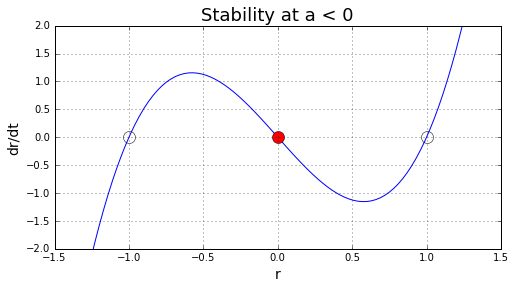

In [14]:
a = -3
rvals = linspace(-1.5,1.5,101)
yvals = a*rvals*(1-rvals**2)
figure(figsize=(8,4))
plot(rvals,yvals)
ylim([-2,2])
plot(0,0,'ro',markersize=12)
plot(1,0,'ro',markerfacecolor='none',markersize=12)
plot(-1,0,'ro',markerfacecolor='none',markersize=12)
xlabel('r',fontsize=14)
ylabel('dr/dt',fontsize=14)
title('Stability at a < 0'.format(a),fontsize=18)
grid('on')